<a href="https://colab.research.google.com/github/dmherrera/Automatidata/blob/main/5_Automatidata_project_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
# Packages for visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns
# Packages for date conversions for calculating trip durations
### YOUR CODE HERE ###
from datetime import datetime
from datetime import date
from datetime import timedelta
# Packages for OLS, MLR, confusion matrix
### YOUR CODE HERE ###
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
pd.set_option('display.max_columns', None)

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
import zipfile
with zipfile.ZipFile("./archive.zip","r") as zip_ref:
    zip_ref.extractall()

In [2]:
# Load dataset into dataframe
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data (1).csv")

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [4]:
# Start with `.shape` and `.info()`
### YOUR CODE HERE ###
df0.shape



(22699, 18)

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [5]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [7]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
### YOUR CODE HERE ###
df0.isna().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [3]:
df0 = df0.drop_duplicates()

Use `.describe()`.

In [9]:
# Use .describe()
### YOUR CODE HERE ###
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [4]:
# Check the format of the data
### YOUR CODE HERE ###
df0['tpep_pickup_datetime']

0         03/25/2017 8:55:43 AM
1         04/11/2017 2:53:28 PM
2         12/15/2017 7:26:56 AM
3         05/07/2017 1:17:59 PM
4        04/15/2017 11:32:20 PM
                  ...          
22694     02/24/2017 5:37:23 PM
22695     08/06/2017 4:43:59 PM
22696     09/04/2017 2:54:14 PM
22697    07/15/2017 12:56:30 PM
22698     03/02/2017 1:02:49 PM
Name: tpep_pickup_datetime, Length: 22699, dtype: object

In [5]:
# Convert datetime columns to datetime
### YOUR CODE HERE ###
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])

In [14]:
df0.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [6]:
# Create `duration` column
### YOUR CODE HERE ###
df0['duration'] = df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']

In [7]:
df0['duration'] = df0['duration'].dt.total_seconds()/60

In [8]:
df0['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [89]:
df0['duration'].head(10)

0    14.066667
1    26.500000
2     7.200000
3    30.250000
4    16.716667
5     8.000000
6    59.633333
7    21.983333
8    12.116667
9    20.433333
Name: duration, dtype: float64

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [26]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             22699 non-null  int64          
 1   VendorID               22699 non-null  int64          
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns] 
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns] 
 4   passenger_count        22699 non-null  int64          
 5   trip_distance          22699 non-null  float64        
 6   RatecodeID             22699 non-null  int64          
 7   store_and_fwd_flag     22699 non-null  object         
 8   PULocationID           22699 non-null  int64          
 9   DOLocationID           22699 non-null  int64          
 10  payment_type           22699 non-null  int64          
 11  fare_amount            22699 non-null  float64        
 12  extra                  22699 non-null  float64

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



In [90]:
df0[['trip_distance', 'fare_amount', 'duration']].describe()

,trip_distance,fare_amount,duration
count,22699.000000,22699.000000,22699.000000
mean,2.913313,12.897913,17.013777
std,3.653171,10.541137,61.996482
min,0.000000,0.000000,-16.983333
25%,0.990000,6.500000,6.650000
50%,1.610000,9.500000,11.183333
75%,3.060000,14.500000,18.383333
max,33.960000,62.500000,1439.550000


### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

<Axes: ylabel='trip_distance'>

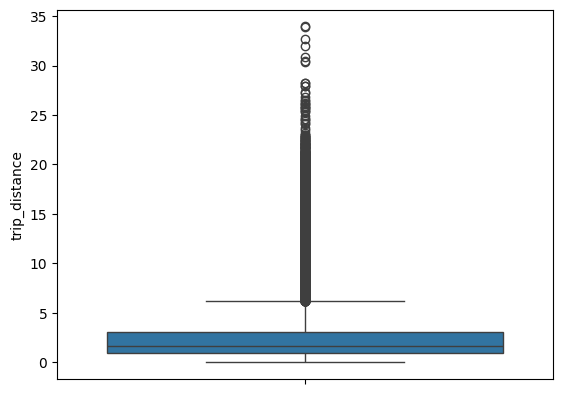

In [31]:
### YOUR CODE HERE ###

sns.boxplot(df0['trip_distance'])

<Axes: ylabel='fare_amount'>

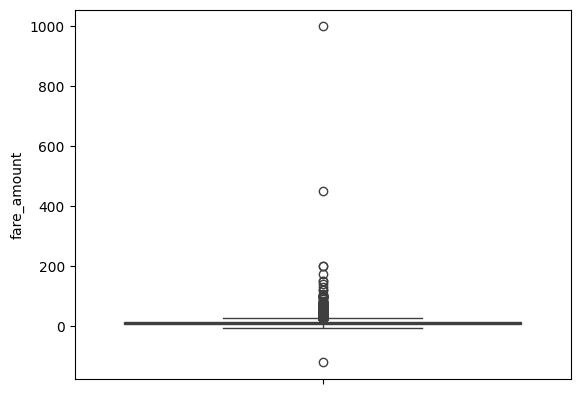

In [32]:
sns.boxplot(df0['fare_amount'])

<Axes: ylabel='duration'>

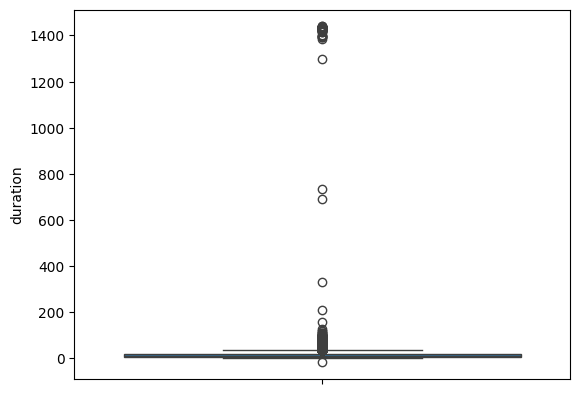

In [91]:
sns.boxplot(df0['duration'])

**Questions:**
1. Which variable(s) contains outliers?

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

1. All of them

2.Yes, although it may be more common to take short trips, it is not unrealistic to occasionally take longer trips- i.e.- to the ariport. The max distance is also not unbelievaibly long.

3.The lower end for fare amount and duration is sketchy. Both are negative numbers, which may skew the model.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [9]:
# Are trip distances of 0 bad data or very short trips rounded down?
### YOUR CODE HERE ###
clean_distance = df0['trip_distance'].drop_duplicates().sort_values().head(10)
clean_distance


128      0.00
2985     0.01
323      0.02
3158     0.03
1510     0.04
10146    0.05
4423     0.06
922      0.07
4623     0.08
22035    0.09
Name: trip_distance, dtype: float64

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [9]:
### YOUR CODE HERE ###
counts = (df0['trip_distance'] == 0.0).value_counts()
counts

trip_distance
False    22551
True       148
Name: count, dtype: int64

#### `fare_amount` outliers

In [46]:
### YOUR CODE HERE ###
df0['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [10]:
# Impute values less than $0 with 0
### YOUR CODE HERE ###
df0.loc[df0['fare_amount'] < 0, 'fare_amount'] = 0

In [11]:
df0['fare_amount'].describe()

count    22699.000000
mean        13.033832
std         13.212462
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [12]:
### YOUR CODE HERE ###
def max_value(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
  ### YOUR CODE HERE ###

        # Reassign minimum to zero
        ### YOUR CODE HERE ###
    for column in column_list:
      df0.loc[df0[column] < 0, column] = 0
        # Calculate upper threshold
     ### YOUR CODE HERE ###
      IQR = df0[column].quantile(0.75) - df0[column].quantile(0.25)
      upper_threshold = df0[column].quantile(0.75) + (iqr_factor * IQR)
      print(column)
      print('q3:', df0[column].quantile(0.75))
      print('upper_threshold:', upper_threshold)
        # Reassign values > threshold to threshold
      ### YOUR CODE HERE ###
      df0.loc[df0[column] >= upper_threshold, column] = upper_threshold
      print(df0[column].describe())



In [13]:
outlier_columns = ['fare_amount']
max_value(outlier_columns, 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64


#### `duration` outliers


In [14]:
# Call .describe() for duration outliers
### YOUR CODE HERE ###
df0['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [14]:
# Impute a 0 for any negative values
### YOUR CODE HERE ###
df0.loc[df0['duration'] < 0, 'duration'] = 0

In [15]:
df0['duration'].describe()

count    22699.000000
mean        17.014525
std         61.996174
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

In [16]:
# Impute the high outliers
### YOUR CODE HERE ###
outlier_columns = ['duration']
max_value(outlier_columns, 6)


duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [17]:
# Create `pickup_dropoff` column
### YOUR CODE HERE ###
df0['pickup_dropoff'] = df0['DOLocationID'].astype(str) + " " + df0['PULocationID'].astype(str)

In [18]:
df0['pickup_dropoff']

0        231 100
1         43 186
2        236 262
3         97 188
4          112 4
          ...   
22694     186 48
22695    164 132
22696    234 107
22697     144 68
22698    236 239
Name: pickup_dropoff, Length: 22699, dtype: object

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [19]:
### YOUR CODE HERE ###
grouped = df0.groupby('pickup_dropoff')[['trip_distance']].agg('mean')
grouped[:10]

,trip_distance
pickup_dropoff,
1 1,2.433333
1 100,16.890000
1 107,15.550000
1 125,14.670000
1 138,32.720000
1 151,23.000000
1 158,16.300000
1 161,19.615000
1 162,18.000000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [20]:
# 1. Convert `grouped` to a dictionary
### YOUR CODE HERE ###
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
### YOUR CODE HERE ###
grouped_dict = grouped_dict.pop('trip_distance')

In [110]:
grouped_dict

{'1 1': 2.433333333333333,
 '1 100': 16.89,
 '1 107': 15.55,
 '1 125': 14.67,
 '1 138': 32.72,
 '1 151': 23.0,
 '1 158': 16.3,
 '1 161': 19.615000000000002,
 '1 162': 18.0,
 '1 163': 18.05,
 '1 164': 17.773333333333333,
 '1 166': 20.5,
 '1 170': 16.876666666666665,
 '1 186': 17.3,
 '1 230': 18.226666666666667,
 '1 233': 22.03,
 '1 237': 18.13,
 '1 246': 18.99,
 '1 249': 13.65,
 '1 43': 19.905,
 '1 68': 17.035,
 '1 79': 16.2,
 '1 90': 17.91,
 '10 132': 3.75,
 '100 100': 0.25333333333333335,
 '100 107': 1.436,
 '100 113': 1.9775,
 '100 114': 2.3966666666666665,
 '100 12': 4.0,
 '100 125': 2.1100000000000003,
 '100 13': 3.9799999999999995,
 '100 132': 17.6,
 '100 137': 1.458,
 '100 138': 9.765,
 '100 141': 2.5149999999999997,
 '100 142': 1.6228571428571428,
 '100 143': 2.1999999999999997,
 '100 144': 2.7960000000000003,
 '100 148': 3.3,
 '100 158': 1.7566666666666666,
 '100 161': 1.1113333333333335,
 '100 162': 1.1625,
 '100 163': 1.181904761904762,
 '100 164': 0.6866666666666668,
 '100 1

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [21]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
### YOUR CODE HERE ###
df0['mean_distance'] = df0['pickup_dropoff'].copy()

# 2. Map `grouped_dict` to the `mean_distance` column
### YOUR CODE HERE ###
df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)
# Confirm that it worked
### YOUR CODE HERE ###
df0['mean_distance']


0         3.521667
1         3.108889
2         0.881429
3         3.700000
4         4.435000
           ...    
22694     1.098214
22695    18.757500
22696     0.684242
22697     2.077500
22698     1.476970
Name: mean_distance, Length: 22699, dtype: float64

In [33]:
test = df0[df0['pickup_dropoff'] == '1 1']

In [23]:
test[['pickup_dropoff', 'mean_distance']]

,pickup_dropoff,mean_distance
3582,1 1,2.433333
6485,1 1,2.433333
13359,1 1,2.433333


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [24]:
### YOUR CODE HERE ###

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
### YOUR CODE HERE ###
grouped2 = df0.groupby('pickup_dropoff')[['duration']].agg('mean')
duration_dict = grouped2.to_dict()
# Confirm that it worked
### YOUR CODE HERE ###

In [25]:
duration_dict = duration_dict.pop('duration')

In [28]:
duration_dict

{'1 1': 0.4666666666666666,
 '1 100': 48.18333333333333,
 '1 107': 27.55,
 '1 125': 34.333333333333336,
 '1 138': 67.48333333333333,
 '1 151': 88.78333333333333,
 '1 158': 38.916666666666664,
 '1 161': 40.19166666666666,
 '1 162': 32.28333333333333,
 '1 163': 37.833333333333336,
 '1 164': 35.88888888888889,
 '1 166': 34.63333333333333,
 '1 170': 38.955555555555556,
 '1 186': 31.916666666666668,
 '1 230': 36.85,
 '1 233': 31.183333333333334,
 '1 237': 45.78333333333333,
 '1 246': 31.883333333333333,
 '1 249': 27.05,
 '1 43': 42.7,
 '1 68': 33.05833333333334,
 '1 79': 41.8,
 '1 90': 33.06666666666667,
 '10 132': 8.98611111111111,
 '100 100': 3.130555555555556,
 '100 107': 17.813333333333333,
 '100 113': 13.970833333333333,
 '100 114': 15.783333333333331,
 '100 12': 22.366666666666667,
 '100 125': 16.058333333333334,
 '100 13': 25.583333333333336,
 '100 132': 68.73333333333333,
 '100 137': 12.723333333333333,
 '100 138': 36.66458333333333,
 '100 141': 15.508333333333333,
 '100 142': 12.30

In [29]:
# Confirm that it worked
### YOUR CODE HERE ###
df0['mean_duration'] = df0['pickup_dropoff'].copy()

# 2. Map `grouped_dict` to the `mean_distance` column
### YOUR CODE HERE ###
df0['mean_duration'] = df0['mean_duration'].map(duration_dict)
# Confirm that it worked
### YOUR CODE HERE ###
df0['mean_duration']

0        22.847222
1        24.470370
2         7.250000
3        30.250000
4        14.616667
           ...    
22694     8.594643
22695    59.560417
22696     6.609091
22697    16.650000
22698     9.405556
Name: mean_duration, Length: 22699, dtype: float64

In [34]:
test[['pickup_dropoff', 'mean_duration']]

,pickup_dropoff,mean_duration
3582,1 1,0.466667
6485,1 1,0.466667
13359,1 1,0.466667


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [35]:
# Create 'day' col
### YOUR CODE HERE ###
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name().str.lower()
# Create 'month' col
### YOUR CODE HERE ###
df0['month'] = df0['tpep_pickup_datetime'].dt.strftime("%B")

In [36]:
df0

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,14.066667,231 100,3.521667,22.847222,saturday,March
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,26.500000,43 186,3.108889,24.470370,tuesday,April
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,7.200000,236 262,0.881429,7.250000,friday,December
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,30.250000,97 188,3.700000,30.250000,sunday,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,16.716667,112 4,4.435000,14.616667,saturday,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,3.266667,186 48,1.098214,8.594643,friday,February
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,40.800000,164 132,18.757500,59.560417,sunday,August
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,4.133333,234 107,0.684242,6.609091,monday,September
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,11.933333,144 68,2.077500,16.650000,saturday,July


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [37]:
# Create 'rush_hour' col
### YOUR CODE HERE ###
weekday = df0['tpep_pickup_datetime'].dt.weekday < 5
hours = ((df0['tpep_pickup_datetime'].dt.hour >= 6) & (df0['tpep_pickup_datetime'].dt.hour <= 10)) | ((df0['tpep_pickup_datetime'].dt.hour >= 16) & (df0['tpep_pickup_datetime'].dt.hour <= 20))
df0['rush_hour'] = weekday & hours

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
### YOUR CODE HERE ###


In [38]:
df0['rush_hour'] = np.where(df0['rush_hour'] == False, 0, 1)

In [39]:
### YOUR CODE HERE ###
df0['rush_hour']

0        0
1        0
2        1
3        0
4        0
        ..
22694    1
22695    0
22696    0
22697    0
22698    0
Name: rush_hour, Length: 22699, dtype: int64

In [40]:

### YOUR CODE HERE ###
df0.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,231 100,3.521667,22.847222,saturday,March,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,43 186,3.108889,24.470370,tuesday,April,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,236 262,0.881429,7.250000,friday,December,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,97 188,3.700000,30.250000,sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,112 4,4.435000,14.616667,saturday,April,0
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,8.000000,236 161,2.052258,11.855376,saturday,March,0
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16,59.633333,241 79,12.830000,59.633333,wednesday,May,1
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58,21.983333,114 237,4.022500,26.437500,tuesday,August,1
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,12.116667,249 234,1.019259,7.873457,saturday,February,0
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55,20.433333,237 239,1.580000,10.541111,friday,November,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

<Axes: xlabel='mean_duration', ylabel='fare_amount'>

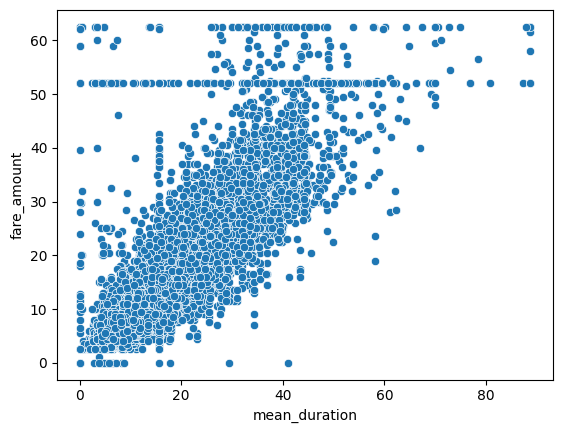

In [41]:
# Create a scatterplot to visualize the relationship between variables of interest
### YOUR CODE HERE ###
sns.scatterplot(data=df0, x='mean_duration', y='fare_amount')


The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [74]:
### YOUR CODE HERE ###

df0[df0['fare_amount'] == 52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,132 236,19.211667,40.500000,sunday,March,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,163 132,19.229000,52.941667,saturday,June,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,saturday,November,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,79 132,19.431667,47.275000,wednesday,December,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,234 132,17.654000,49.833333,sunday,September,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,48 132,18.761905,58.246032,tuesday,February,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,88 228,4.730000,15.616667,monday,June,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,48 132,18.761905,58.246032,thursday,August,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,132 186,17.096000,42.920000,tuesday,September,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,148 132,17.994286,46.340476,sunday,April,0


Examine the first 30 of these trips.

**Question:** What do you notice about the first 30 trips?

Most of them were either picked up or dropped off at location #132

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [69]:
### YOUR CODE HERE ###
df2 = df0.copy()
df2 = df2.drop(columns=['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'RatecodeID', 'store_and_fwd_flag','pickup_dropoff', 'improvement_surcharge', 'mta_tax','tolls_amount','extra','trip_distance'])

In [70]:
### YOUR CODE HERE ###
df2

,VendorID,passenger_count,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,duration,mean_distance,mean_duration,day,month,rush_hour
0,2,6,100,231,1,13.0,2.76,16.56,14.066667,3.521667,22.847222,saturday,March,0
1,1,1,186,43,1,16.0,4.00,20.80,26.500000,3.108889,24.470370,tuesday,April,0
2,1,1,262,236,1,6.5,1.45,8.75,7.200000,0.881429,7.250000,friday,December,1
3,2,1,188,97,1,20.5,6.39,27.69,30.250000,3.700000,30.250000,sunday,May,0
4,2,1,4,112,2,16.5,0.00,17.80,16.716667,4.435000,14.616667,saturday,April,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2,3,48,186,2,4.0,0.00,5.80,3.266667,1.098214,8.594643,friday,February,1
22695,2,1,132,164,1,52.0,14.64,73.20,40.800000,18.757500,59.560417,sunday,August,0
22696,2,1,107,234,2,4.5,0.00,5.30,4.133333,0.684242,6.609091,monday,September,0
22697,2,1,68,144,1,10.5,1.70,13.00,11.933333,2.077500,16.650000,saturday,July,0


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

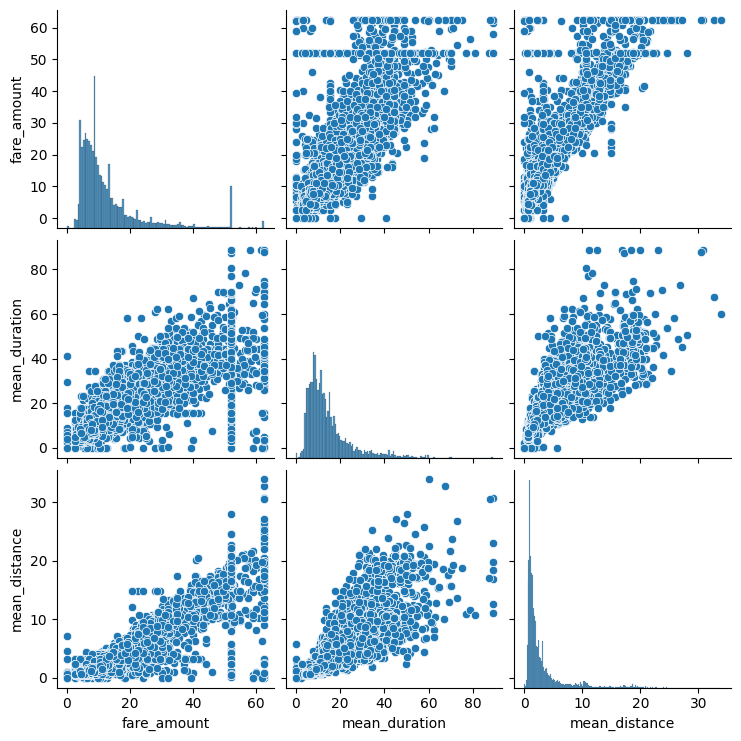

In [95]:
# Create a pairplot to visualize pairwise relationships between variables in the data
### YOUR CODE HERE ###
sns.pairplot(data=df[['fare_amount', 'mean_duration', 'mean_distance']] )

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [52]:
# Correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###a
df1 = df[['fare_amount', 'mean_duration', 'mean_distance']]
cm = df1.corr()
cm

,fare_amount,mean_duration,mean_distance
fare_amount,1.000000,0.859105,0.910185
mean_duration,0.859105,1.000000,0.874864
mean_distance,0.910185,0.874864,1.000000


In [58]:
cm2 = df.corr(numeric_only=True)

Visualize a correlation heatmap of the data.

<Axes: >

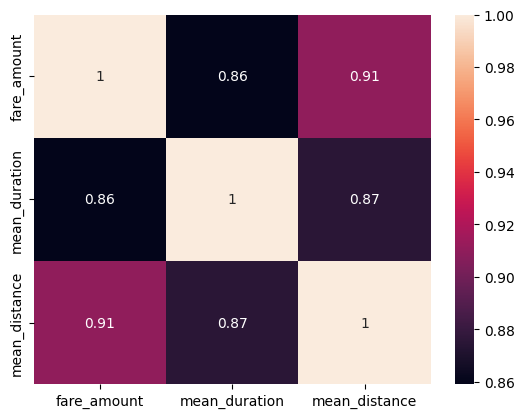

In [53]:
# Create correlation heatmap
### YOUR CODE HERE ###
sns.heatmap(cm, annot=True)

<Axes: >

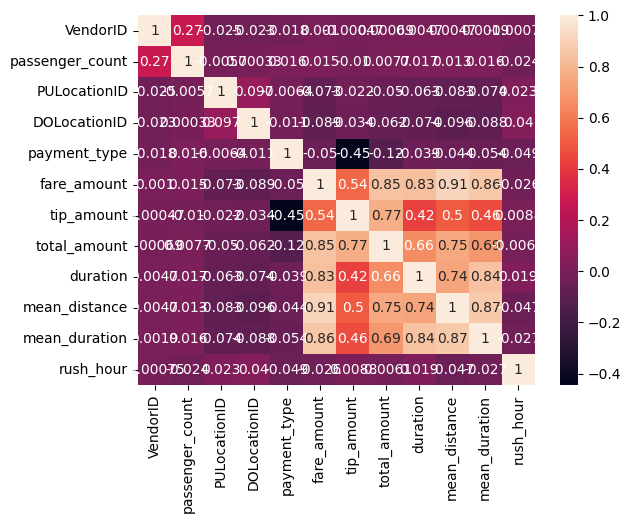

In [59]:
sns.heatmap(cm2, annot=True)

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`?

Try modeling with both variables even though they are correlated.

### Task 8a. Split data into outcome variable and features

In [64]:
### YOUR CODE HERE ###
df = df.drop(columns=['day', 'month'])


In [65]:
df

,fare_amount,tip_amount,total_amount,duration,mean_distance,mean_duration
0,13.0,2.76,16.56,14.066667,3.521667,22.847222
1,16.0,4.00,20.80,26.500000,3.108889,24.470370
2,6.5,1.45,8.75,7.200000,0.881429,7.250000
3,20.5,6.39,27.69,30.250000,3.700000,30.250000
4,16.5,0.00,17.80,16.716667,4.435000,14.616667
...,...,...,...,...,...,...
22694,4.0,0.00,5.80,3.266667,1.098214,8.594643
22695,52.0,14.64,73.20,40.800000,18.757500,59.560417
22696,4.5,0.00,5.30,4.133333,0.684242,6.609091
22697,10.5,1.70,13.00,11.933333,2.077500,16.650000


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [71]:
# Remove the target column from the features
X = df2.drop(columns='fare_amount')
### YOUR CODE HERE ###

# Set y variable
### YOUR CODE HERE ###
y  = df2['fare_amount']
# Display first few rows
### YOUR CODE HERE ###
print(X.head(),'\n', y.head())

   VendorID  passenger_count  PULocationID  DOLocationID  payment_type  \
0         2                6           100           231             1   
1         1                1           186            43             1   
2         1                1           262           236             1   
3         2                1           188            97             1   
4         2                1             4           112             2   

   tip_amount  total_amount   duration  mean_distance  mean_duration  \
0        2.76         16.56  14.066667       3.521667      22.847222   
1        4.00         20.80  26.500000       3.108889      24.470370   
2        1.45          8.75   7.200000       0.881429       7.250000   
3        6.39         27.69  30.250000       3.700000      30.250000   
4        0.00         17.80  16.716667       4.435000      14.616667   

        day     month  rush_hour  
0  saturday     March          0  
1   tuesday     April          0  
2    friday  Dece

In [72]:
X=df2.drop(columns=['day', 'month'])

### Task 8b. Pre-process data


Dummy encode categorical variables

In [73]:
# Convert VendorID to string
### YOUR CODE HERE ###
df2['VendorID'] = df2['VendorID'].astype(str)


In [77]:
# Get dummies
### YOUR CODE HERE ###
df2['VendorID'] = pd.get_dummies(df2['VendorID'], drop_first=True, dtype=int)

In [79]:
X['VendorID'] = df2['VendorID']

In [80]:
X


,VendorID,passenger_count,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,total_amount,duration,mean_distance,mean_duration,rush_hour
0,1,6,100,231,1,13.0,2.76,16.56,14.066667,3.521667,22.847222,0
1,0,1,186,43,1,16.0,4.00,20.80,26.500000,3.108889,24.470370,0
2,0,1,262,236,1,6.5,1.45,8.75,7.200000,0.881429,7.250000,1
3,1,1,188,97,1,20.5,6.39,27.69,30.250000,3.700000,30.250000,0
4,1,1,4,112,2,16.5,0.00,17.80,16.716667,4.435000,14.616667,0
...,...,...,...,...,...,...,...,...,...,...,...,...
22694,1,3,48,186,2,4.0,0.00,5.80,3.266667,1.098214,8.594643,1
22695,1,1,132,164,1,52.0,14.64,73.20,40.800000,18.757500,59.560417,0
22696,1,1,107,234,2,4.5,0.00,5.30,4.133333,0.684242,6.609091,0
22697,1,1,68,144,1,10.5,1.70,13.00,11.933333,2.077500,16.650000,0


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [126]:
# Create training and testing sets
#### YOUR CODE HERE ####
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.20, random_state=0)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [128]:
# Standardize the X variables
### YOUR CODE HERE ###
scaler = StandardScaler().fit(X_train)


X_train_scaled = scaler.transform(X_train)

X_train_scaled.shape


(4540, 12)

In [129]:
y_train.shape

(4540,)

### Fit the model

Instantiate your model and fit it to the training data.

In [130]:
# Fit your model to the training data
### YOUR CODE HERE ###
lg = LinearRegression()
lg.fit(X_train_scaled, y_train)


LinearRegression()

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [131]:
# Evaluate the model performance on the training data
### YOUR CODE HERE ###
#mean_absolute_error,r2_score,mean_squared_error

y_pred = lg.predict(X_train_scaled)



In [132]:
mean_absolute_error(y_train, y_pred)

1.1140378878815778e-14

In [133]:
r2_score(y_train, y_pred)

1.0

In [134]:
mean_squared_error(y_train, y_pred)

3.8679396628373096e-28

### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [116]:
# Scale the X_test data
### YOUR CODE HERE ###
fit = scaler.fit(X_test)

X_test_scaled = fit.transform(X_test)

In [117]:
# Evaluate the model performance on the testing data
### YOUR CODE HERE ###
y_pred2 = lg.predict(X_test_scaled)

print('mean absolute error: ', mean_absolute_error(y_test, y_pred2))
print('r2 score: ', r2_score(y_test, y_pred2))
print('mean squared error: ', mean_squared_error(y_test, y_pred2))

mean absolute error:  0.10956261485776944
r2 score:  0.9998141840216261
mean squared error:  0.02075593168045618


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [123]:
# Create a `results` dataframe
### YOUR CODE HERE ###
results = pd.DataFrame(data={'actual': y_test,
                             'predicted': y_pred2})
results['residual'] = results['actual'] - results['predicted']
results.head()




,actual,predicted,residual
252,19.5,19.442838,0.057162
16220,4.5,4.642572,-0.142572
9795,6.5,6.615941,-0.115941
1972,5.0,5.135915,-0.135915
21092,7.5,7.602625,-0.102625


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

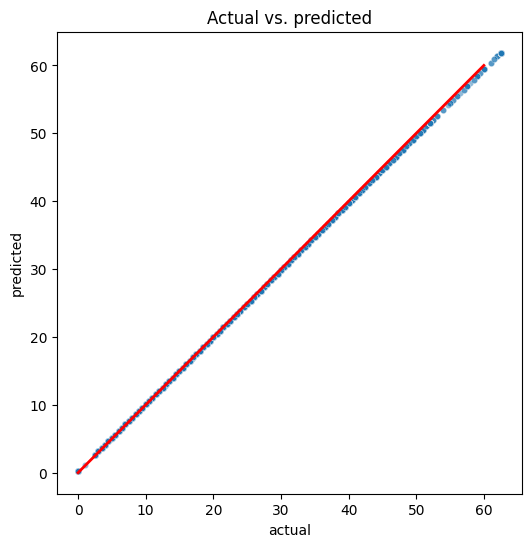

In [136]:
# Create a scatterplot to visualize `predicted` over `actual`
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(data=results, x='actual', y='predicted', s=20,
                alpha=0.5,
                ax=ax)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

Visualize the distribution of the `residuals` using a histogram.

<Axes: xlabel='residual', ylabel='Count'>

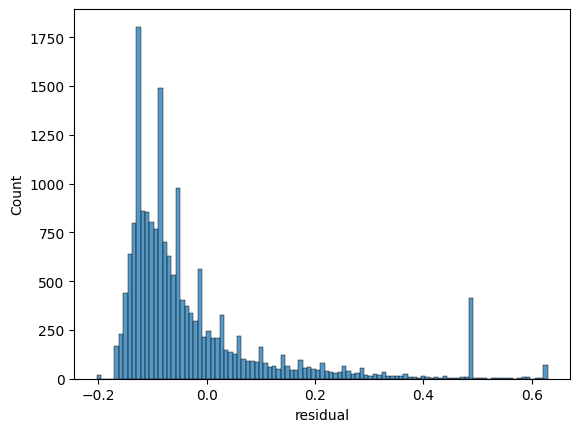

In [139]:
# Visualize the distribution of the `residuals`
### YOUR CODE HERE ###
sns.histplot(results['residual'])



In [141]:
# Calculate residual mean
### YOUR CODE HERE ###
residual_mean = results['residual'].mean()
residual_mean

-0.03083085097788881

Create a scatterplot of `residuals` over `predicted`.

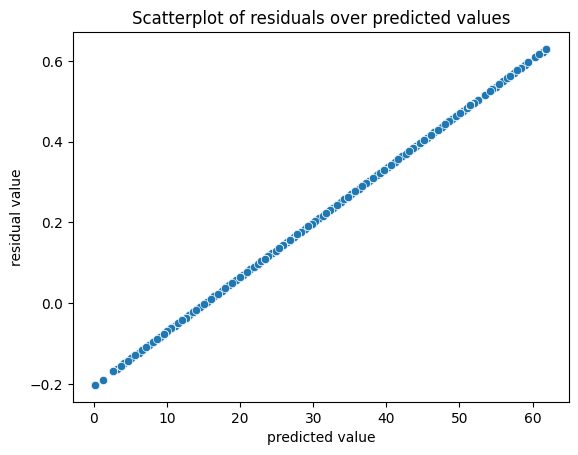

In [144]:
# Create a scatterplot of `residuals` over `predicted`
### YOUR CODE HERE ###
sns.scatterplot(x='predicted', y='residual', data=results)

plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [148]:
# Output the model's coefficients
coefficients = lg.coef_
coefficients

array([ 3.46235758e-16,  1.77635684e-15, -9.85322934e-16,  2.87443680e-15,
       -2.30371278e-15,  1.04281635e+01, -5.38111222e-15,  1.41692214e-14,
       -2.88449820e-14, -5.77801695e-14,  3.37160855e-14,  4.85722573e-17])

In [151]:
X.columns

Index(['VendorID', 'passenger_count', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'tip_amount', 'total_amount', 'duration',
       'mean_distance', 'mean_duration', 'rush_hour'],
      dtype='object')

What do these coefficients mean? How should they be interpreted?

Pick up location, total_amount (which is the redundant variable), and mean_distance.

It would be interesting to test the model without total amount to see if it's as precise as it was with this variable.

# RETEST WITHOUT TOTAL AMOUNT

In [158]:
df2 = df2.drop(columns=['day', 'month'])

In [160]:
X = df2.drop(columns='fare_amount')

In [161]:
y = df2['fare_amount']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [164]:
#Scale X
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [166]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [167]:
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

In [169]:
r_sq_test = model.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = model.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.9164288046180129
R^2: 0.9164288046180129
MAE: 1.2193232152070965
MSE: 9.08808283751208
RMSE: 3.0146447282411373


In [171]:
results = pd.DataFrame(data={'actual': y_test,
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,13.929652,0.070348
18134,28.0,23.893858,4.106142
4655,5.5,6.359432,-0.859432
7378,15.5,16.494984,-0.994984
13914,9.5,10.190962,-0.690962


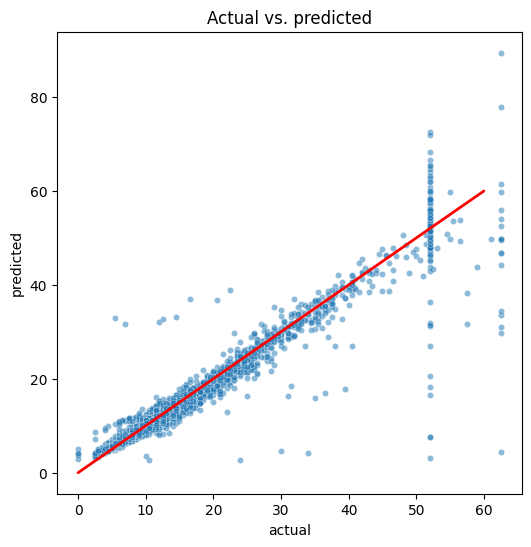

In [172]:
# Create a scatterplot to visualize `predicted` over `actual`
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

Here we can see the drastic line of the 52 and 62 values that we had before, even with these outliers, the model does well with prediction

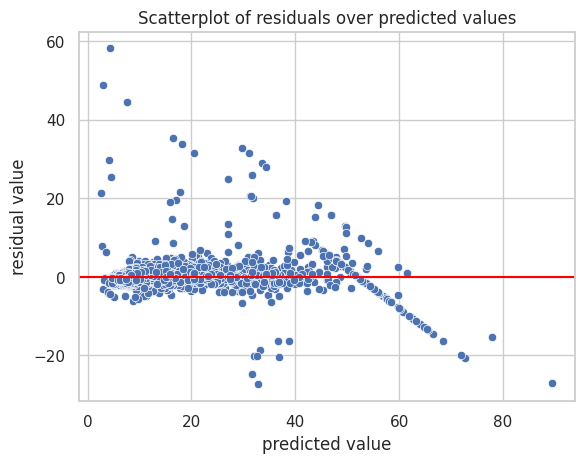

In [173]:
sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

In [175]:
# Get model coefficients
model.coef_

array([-5.19079580e-02,  1.48105962e-02,  3.14510367e-02, -1.05325432e-03,
       -8.45630789e-02,  3.79184893e+00,  7.13692932e+00, -3.98011866e-01,
       -4.38520897e-02])

In [176]:
X.columns

Index(['VendorID', 'passenger_count', 'PULocationID', 'DOLocationID',
       'payment_type', 'duration', 'mean_distance', 'mean_duration',
       'rush_hour'],
      dtype='object')